In [1]:
using Plots

In [96]:
include("nonlinear_growth.jl")

Main.nonlinear_growth

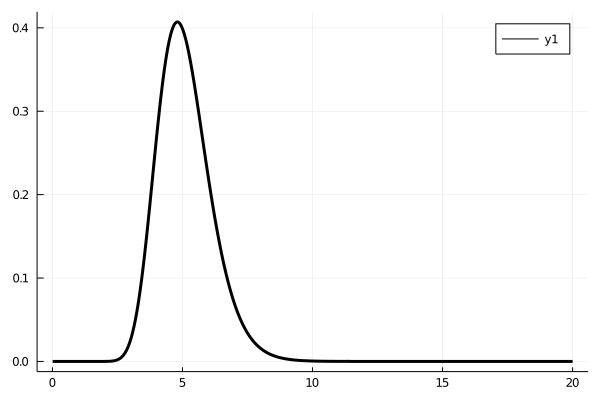

In [97]:
x = 0.01:0.01:20
mu = 5.0
sigma = 0.2
y = nonlinear_growth.logNormal.(x,mu,sigma)
Plots.plot(x,y,color = "black", width = 3)

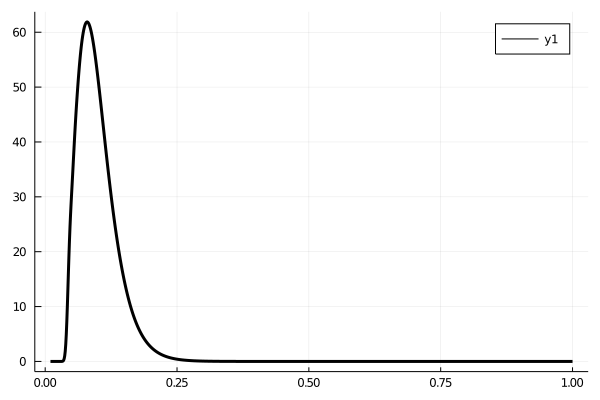

In [98]:
x = 0.01:0.001:1
y = nonlinear_growth.integrated_logNormal_reimann.(x,nonlinear_growth.g,0.1,0.1,0.4)
Plots.plot(x,y,color = "black", width = 3)


In [79]:
#f(x) = nonlinear_growth.integrated_logNormal_reimann(x,nonlinear_growth.g,5.0,0.2,0.1)
#f(x) = nonlinear_growth.logNormal(x,mu,sigma)
function g(x)
    for i in 1:5000
        f(1)
    end
end 
@time g(1)

  0.000447 seconds (5.00 k allocations: 78.125 KiB)


In [111]:
sigma_nu = 0.1
sigma_omega = 0.1
sigma_x = sqrt(-sigma_nu^2 + sigma_nu*sqrt(sigma_nu^2 + 4*sigma_omega^2))/2

0.05558929702514212

In [112]:
C1 = (1/(sigma_x^2+sigma_nu^2)+1/sigma_omega^2)^-1*(1/(sigma_x^2+sigma_nu^2))
C2 = (1/(sigma_x^2+sigma_nu^2)+1/sigma_omega^2)^-1*(1/sigma_omega^2)

0.566915270681799

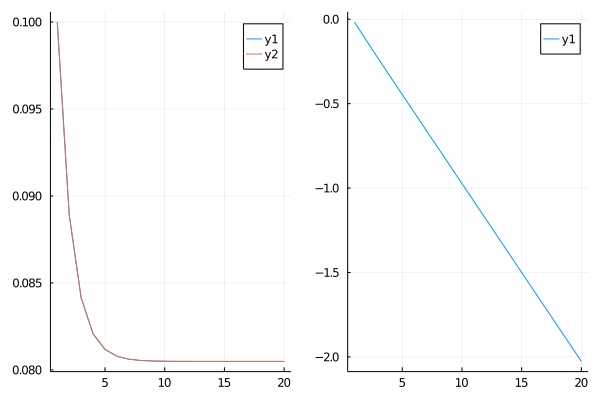

In [212]:
r1,r2 = log(0.9), log(1.0)
x0 = 0
update_mu(mu,t) = C1*(mu + r2) + (1-C1)*(x0+r1*(t+1))
update_chi(chi) = C1*chi + C1*(r2-r1)
N = 20
mu_ls = zeros(N)
chi_ls = zeros(N)
chi2_ls = zeros(N)
mu =  0.1
chi = mu-x0
for t in 0:(N-1)
    chi_ls[t+1] = mu - (x0+r1*(t))
    mu = update_mu(mu,t)
    mu_ls[t+1] = mu
    chi2_ls[t+1] = chi
    chi = update_chi(chi)
    
    
end 
p1 = Plots.plot(chi2_ls)
Plots.plot!(chi_ls)
p2 = Plots.plot(mu_ls)
plot(p1,p2)

In [160]:
1-C2

0.43308472931820097

In [146]:
C1

0.43308472931820097